In [0]:
dimport tensorflow as tf
import tensorflow.keras as keras
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline

print("Tensorflow Version: {}".format(tf.__version__))
print("Tensorflow.Keras Version: {}".format(keras.__version__))

Tensorflow Version: 1.14.0
Tensorflow.Keras Version: 2.2.4-tf


In [0]:
def func(x):
  return 3*x*x + 2*x - 1

In [0]:
x_list = list(range(-100, 100, 1))
y_ = list(map(func, x_list))
x_list[:10], y_[:10]

([-100, -99, -98, -97, -96, -95, -94, -93, -92, -91],
 [29799, 29204, 28615, 28032, 27455, 26884, 26319, 25760, 25207, 24660])

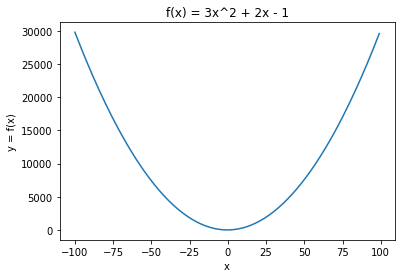

In [0]:
plt.plot(x_list, y_)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("f(x) = 3x^2 + 2x - 1")
plt.show()

In [0]:
def train_generator(start=-1, end=1, batch_size=200):
  _x = np.linspace(start, end, batch_size)
  _y = np.array(list(map(func, _x)))
  x = _x.reshape(-1, 1)
  y = _y.reshape(-1, 1)
  return x, y

In [0]:
tf.reset_default_graph()

learning_rate = 10
training_epochs = 20001

with tf.Graph().as_default() as graph:
  x = tf.placeholder(tf.float32, name="x", shape=[None, 1])
  _y = tf.placeholder(tf.float32, name="label", shape=[None, 1])

  a1 = tf.get_variable("a1", [1,1], initializer=tf.random_normal_initializer(mean=1.0, stddev=1.0))
  a2 = tf.get_variable("a2", [1,1], initializer=tf.random_normal_initializer(mean=1.0, stddev=1.0))
  a3 = tf.get_variable("a3", [1,1], initializer=tf.zeros_initializer)

  # avoid exploding
  a1 = a1 / 100.0
  a2 = a2 / 100.0
  a3 = a3 / 100.0

  y = a1*x*x + a2*x + a3
  loss = tf.square(tf.subtract(_y, y))
  #loss = tf.abs(tf.subtract(_y, y))
  optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-1)
  train_opt = optimizer.minimize(loss)

  with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #print(sess.run(y, feed_dict={x: np.expand_dims(np.array([10]), axis=0)}))

    a1_, a2_, a3_ = sess.run([a1, a2, a3])
    print("starting: a1: {}, a2: {}, a3: {}".format(a1_, a2_, a3_))

    loss_total = 0.
    for epoch in range(training_epochs):
      x_train, y_train = train_generator()
      _, loss_ = sess.run([train_opt, loss], feed_dict={x: x_train, _y: y_train})
      loss_total += np.mean(loss_)

      if epoch % 2000 == 0:
        print("epoch:{}, Average Loss: {:.2f}".format(epoch, loss_total / (epoch + 1e-8)))

        a1_, a2_, a3_ = sess.run([a1, a2, a3])
        print("epoch:{}, After training: a1: {}, a2: {}, a3: {}".format(epoch, a1_, a2_, a3_))
    
    # simple inference
    print()

starting: a1: [[0.00618278]], a2: [[-0.00297324]], a3: [[0.]]
epoch:0, Average Loss: 216354393.96
epoch:0, After training: a1: [[0.0072794]], a2: [[-0.00027577]], a3: [[3.1874402e-05]]
epoch:2000, Average Loss: 0.70
epoch:2000, After training: a1: [[1.4474899]], a2: [[1.8649353]], a3: [[-0.43140742]]
epoch:4000, Average Loss: 0.41
epoch:4000, After training: a1: [[2.1861866]], a2: [[1.9908797]], a3: [[-0.7019422]]
epoch:6000, Average Loss: 0.29
epoch:6000, After training: a1: [[2.573406]], a2: [[1.9993842]], a3: [[-0.8437605]]
epoch:8000, Average Loss: 0.22
epoch:8000, After training: a1: [[2.7763813]], a2: [[1.9999435]], a3: [[-0.9180999]]
epoch:10000, Average Loss: 0.17
epoch:10000, After training: a1: [[2.8827798]], a2: [[1.9999435]], a3: [[-0.9570684]]
epoch:12000, Average Loss: 0.15
epoch:12000, After training: a1: [[2.938553]], a2: [[1.9999435]], a3: [[-0.97749525]]
epoch:14000, Average Loss: 0.12
epoch:14000, After training: a1: [[2.9677875]], a2: [[1.9999435]], a3: [[-0.9882023